In [1]:
import os

os.chdir('..')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: >

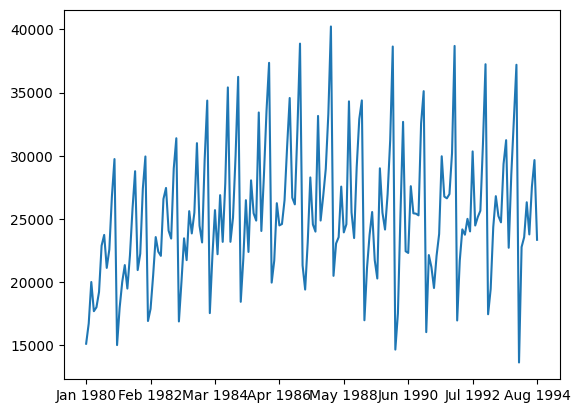

In [3]:
from pmdarima.datasets import load_wineind

# dados mensais
series = load_wineind(as_series=True).dropna()

series.plot()

In [4]:
# divisao entre treino e validacao
from sklearn.model_selection import train_test_split

train, test = train_test_split(series, shuffle=False, test_size=24)

In [5]:
train.tail()

Apr 1992    23757.0
May 1992    25013.0
Jun 1992    24019.0
Jul 1992    30345.0
Aug 1992    24488.0
dtype: float64

In [6]:
test.head()

Sep 1992    25156.0
Oct 1992    25650.0
Nov 1992    30923.0
Dec 1992    37240.0
Jan 1993    17466.0
dtype: float64

In [7]:
# auto arima
import pmdarima as pm

# ?pm.auto_arima

model = pm.auto_arima(train, m=12, trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3090.160, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2933.127, Time=0.08 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2955.445, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3088.177, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=3079.255, Time=0.01 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=2928.093, Time=0.34 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=2929.795, Time=0.50 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=2927.824, Time=0.14 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=2997.750, Time=0.10 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=2929.870, Time=0.46 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=2968.552, Time=0.43 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=2944.142, Time=0.12 sec
 ARIMA(2,1,0)(1,0,1)[12] inte

In [8]:
model.summary()
# https://github.com/statsmodels/statsmodels/blob/db4336b6ef0de96312fbd7156aab4cb72207f768/statsmodels/tsa/statespace/mlemodel.py#L4598

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  152
Model:             SARIMAX(2, 1, 1)x(2, 0, [], 12)   Log Likelihood               -1436.854
Date:                             Mon, 08 Jul 2024   AIC                           2885.708
Time:                                     22:17:36   BIC                           2903.811
Sample:                                 01-01-1980   HQIC                          2893.062
                                      - 08-01-1992                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0372      0.078     -0.474      0.635      -0.191       0.117
ar.L2         -0.2068      0.094     -2.204      0.028      -0.391      -0.023
ma.L1         -0.8642      0.017    -51.259      0.000      -0.897      -0.831
ar.S.L12       0.5049      0.042     12.005      0.000       0.422       0.587
ar.S.L24       0.3327      0.060      5.591      0.000       0.216       0.449
sigma2      9.483e+06   2.28e-09   4.16e+15      0.000    9.48e+06    9.48e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):               492.96
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):               0.48   Skew:                             1.32
Prob(H) (two-sided):                  0.01   Kurtosis:                        11.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.56e+30. Standard errors may be unstable.
"""

In [9]:
from statsmodels.stats.stattools import jarque_bera

?jarque_bera

Signature: jarque_bera(resids, axis=0)
Docstring:
The Jarque-Bera test of normality.

Parameters
----------
resids : array_like
    Data to test for normality. Usually regression model residuals that
    are mean 0.
axis : int, optional
    Axis to use if data has more than 1 dimension. Default is 0.

Returns
-------
JB : {float, ndarray}
    The Jarque-Bera test statistic.
JBpv : {float, ndarray}
    The pvalue of the test statistic.
skew : {float, ndarray}
    Estimated skewness of the data.
kurtosis : {float, ndarray}
    Estimated kurtosis of the data.

Notes
-----
Each output returned has 1 dimension fewer than data

The Jarque-Bera test statistic tests the null that the data is normally
distributed against an alternative that the data follow some other
distribution. The test statistic is based on two moments of the data,
the skewness, and the kurtosis, and has an asymptotic :math:`\chi^2_2`
distribution.

The test statistic is defined

.. math:: JB = n(S^2/6+(K-3)^2/24)

where n 

In [10]:
from statsmodels.stats.diagnostic import acorr_ljungbox

?acorr_ljungbox

Signature:
acorr_ljungbox(
    x,
    lags=None,
    boxpierce=False,
    model_df=0,
    period=None,
    return_df=True,
    auto_lag=False,
)
Docstring:
Ljung-Box test of autocorrelation in residuals.

Parameters
----------
x : array_like
    The data series. The data is demeaned before the test statistic is
    computed.
lags : {int, array_like}, default None
    If lags is an integer then this is taken to be the largest lag
    that is included, the test result is reported for all smaller lag
    length. If lags is a list or array, then all lags are included up to
    the largest lag in the list, however only the tests for the lags in
    the list are reported. If lags is None, then the default maxlag is
    min(10, nobs // 5). The default number of lags changes if period
    is set.
boxpierce : bool, default False
    If true, then additional to the results of the Ljung-Box test also the
    Box-Pierce test results are returned.
model_df : int, default 0
    Number of degrees of 

In [11]:
from statsmodels.tsa.stattools import breakvar_heteroskedasticity_test

?breakvar_heteroskedasticity_test

Signature:
breakvar_heteroskedasticity_test(
    resid,
    subset_length=0.3333333333333333,
    alternative='two-sided',
    use_f=True,
)
Docstring:
Test for heteroskedasticity of residuals

Tests whether the sum-of-squares in the first subset of the sample is
significantly different than the sum-of-squares in the last subset
of the sample. Analogous to a Goldfeld-Quandt test. The null hypothesis
is of no heteroskedasticity.

Parameters
----------
resid : array_like
    Residuals of a time series model.
    The shape is 1d (nobs,) or 2d (nobs, nvars).
subset_length : {int, float}
    Length of the subsets to test (h in Notes below).
    If a float in 0 < subset_length < 1, it is interpreted as fraction.
    Default is 1/3.
alternative : str, 'increasing', 'decreasing' or 'two-sided'
    This specifies the alternative for the p-value calculation. Default
    is two-sided.
use_f : bool, optional
    Whether or not to compare against the asymptotic distribution
    (chi-squared) or the

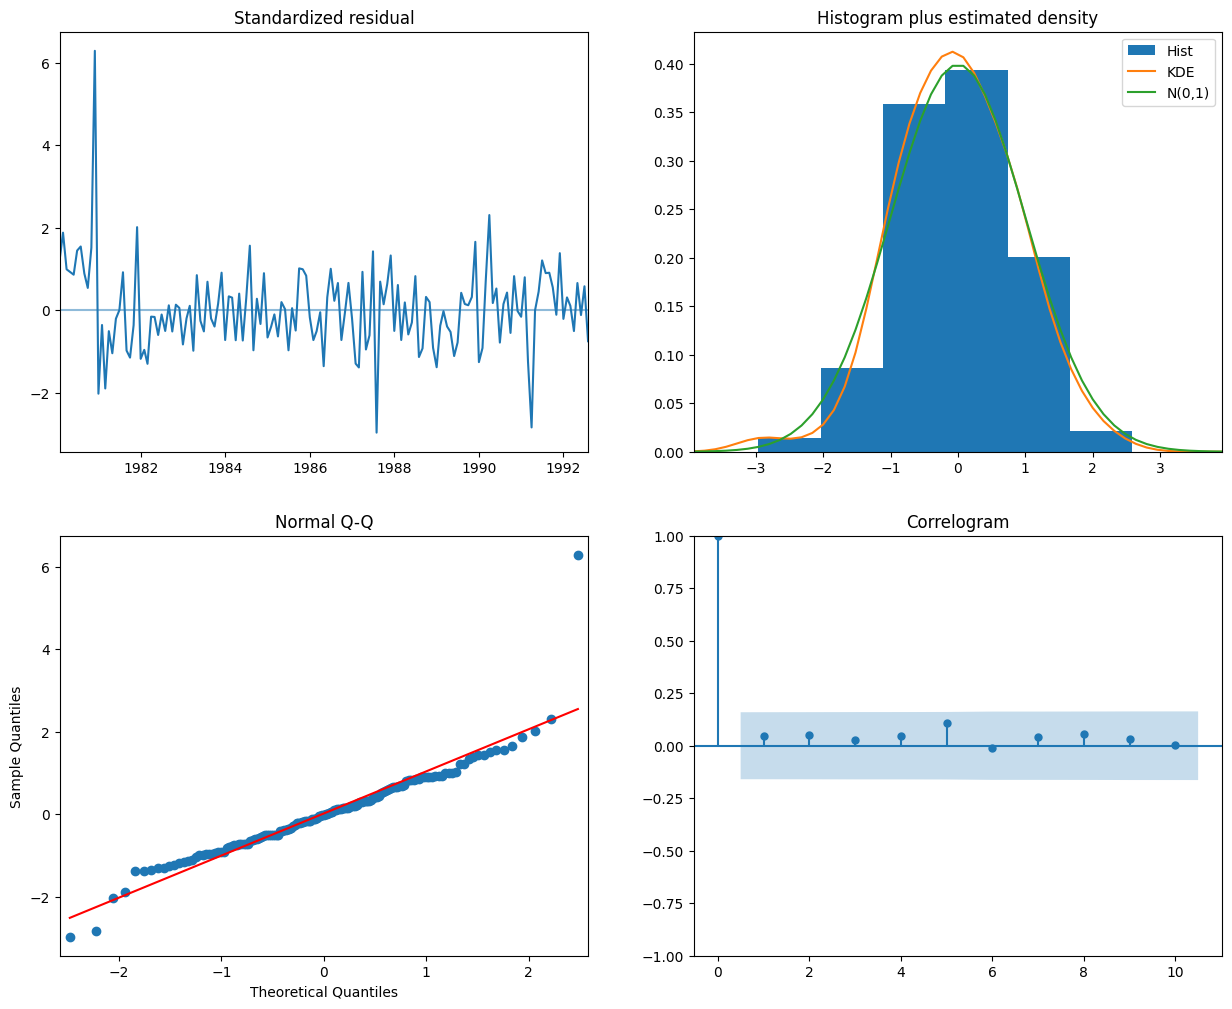

In [12]:
plot=model.plot_diagnostics(figsize=(15, 12))

In [13]:
forecasts = model.predict(24)
forecasts.index = pd.to_datetime(forecasts.index)
forecasts = forecasts.rename('Forecasts') 

forecasts

1992-09-01    26229.042824
1992-10-01    27017.983163
1992-11-01    30672.628684
1992-12-01    35678.051402
1993-01-01    18460.733516
1993-02-01    22895.218427
1993-03-01    23814.109818
1993-04-01    23046.502656
1993-05-01    24530.228226
1993-06-01    24605.273689
1993-07-01    29843.253714
1993-08-01    25825.022962
1993-09-01    26658.389485
1993-10-01    27168.894256
1993-11-01    30090.592554
1993-12-01    35439.575063
1994-01-01    19521.366237
1994-02-01    23331.977393
1994-03-01    24621.801588
1994-04-01    24093.800215
1994-05-01    25260.892612
1994-06-01    24968.045340
1994-07-01    29717.740208
1994-08-01    25739.984748
Freq: MS, Name: Forecasts, dtype: float64

/var/folders/4r/ptn78qsx2vgffms1_tb7v9xw0000gn/T/ipykernel_14680/1119807401.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train.index = pd.to_datetime(train.index)
/var/folders/4r/ptn78qsx2vgffms1_tb7v9xw0000gn/T/ipykernel_14680/1119807401.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test.index = pd.to_datetime(test.index)


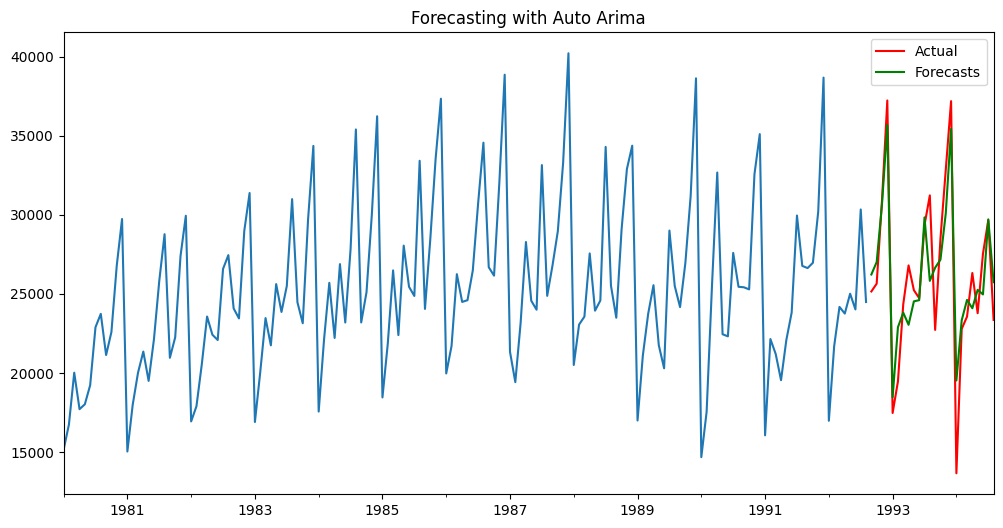

In [14]:
train.index = pd.to_datetime(train.index)
test.index = pd.to_datetime(test.index)

test = test.rename('Actual')

# forecasts_s = pd.Series(forecasts, index=test.index).rename('Forecasts')

ax = train.plot()
ax = test.plot(legend=True, color='red', figsize=(12,6),title='Forecasting with Auto Arima')
ax = forecasts.plot(legend=True, color='green')

In [16]:
# computing the error
from src.error import MASE

err = MASE(train, test, forecasts)

err

0.39851802194262004

In [17]:
AR = pm.ARIMA(order=(1,0,0))
MA = pm.ARIMA(order=(0,0,1))

AR.fit(train)

/Users/vcerq/miniconda/envs/NDS_TimeSeries/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/vcerq/miniconda/envs/NDS_TimeSeries/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(order=(1, 0, 0))

In [18]:
AR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  152
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1515.771
Date:                Mon, 08 Jul 2024   AIC                           3037.542
Time:                        22:17:50   BIC                           3046.614
Sample:                    01-01-1980   HQIC                          3041.228
                         - 08-01-1992                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.001e+04   2069.443      9.667      0.000    1.59e+04    2.41e+04
ar.L1          0.2077      0.069      2.999      0.003       0.072       0.343
sigma2      2.638e+07      0.335   7.88e+07      0.000    2.64e+07    2.64e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):                 0.66
Prob(Q):                              0.64   Prob(JB):                         0.72
Heteroskedasticity (H):               1.38   Skew:                             0.15
Prob(H) (two-sided):                  0.26   Kurtosis:                         3.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.9e+23. Standard errors may be unstable.
"""

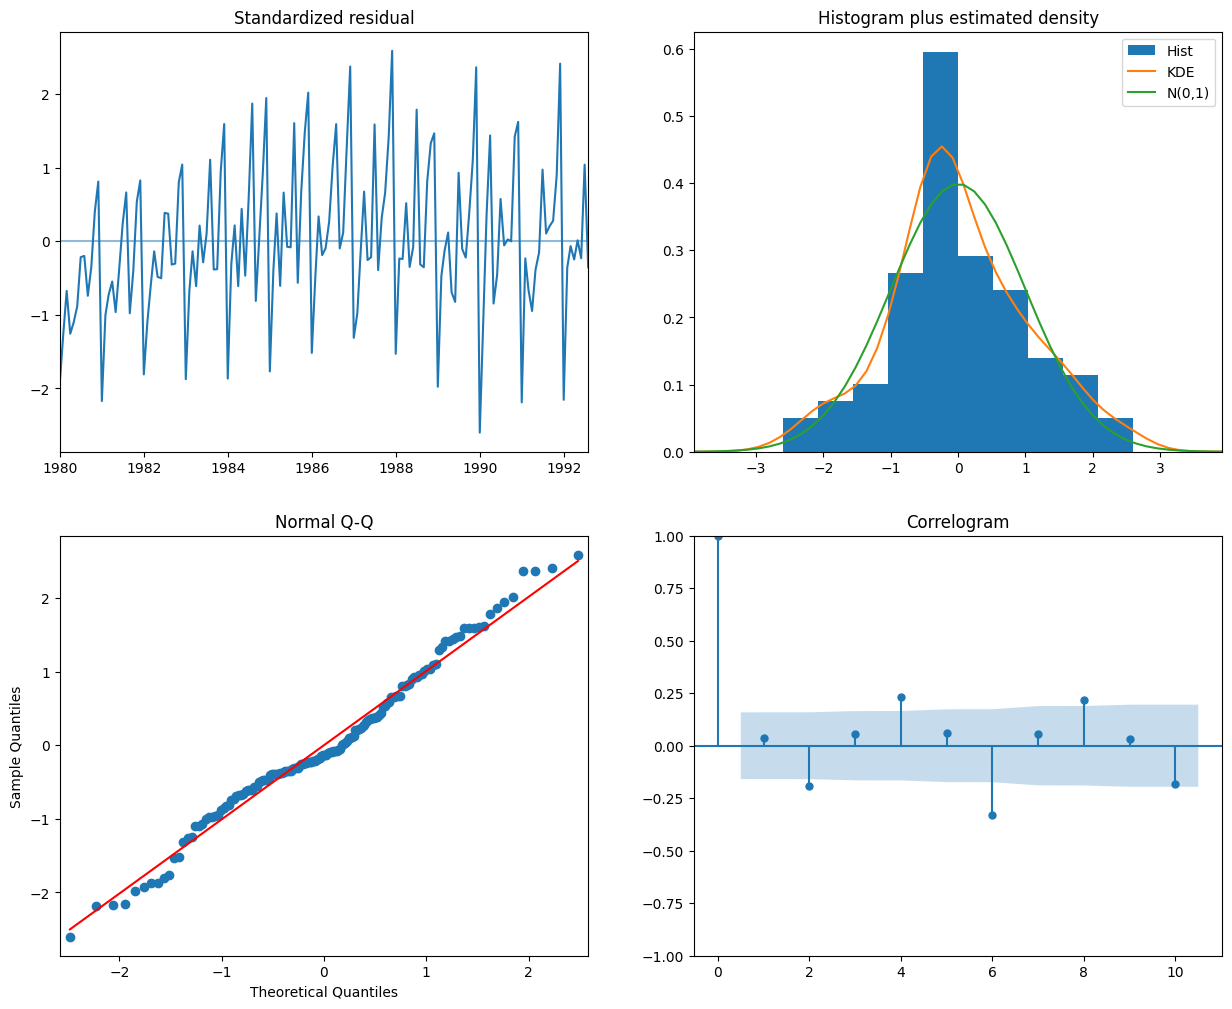

In [19]:
plot=AR.plot_diagnostics(figsize=(15, 12))

In [20]:
MA.fit(train)

MA.summary()

/Users/vcerq/miniconda/envs/NDS_TimeSeries/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/vcerq/miniconda/envs/NDS_TimeSeries/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  152
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -1514.167
Date:                Mon, 08 Jul 2024   AIC                           3034.335
Time:                        22:18:10   BIC                           3043.406
Sample:                    01-01-1980   HQIC                          3038.020
                         - 08-01-1992                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    2.53e+04    674.686     37.506      0.000     2.4e+04    2.66e+04
ma.L1          0.3050      0.089      3.417      0.001       0.130       0.480
sigma2      2.574e+07      0.021   1.23e+09      0.000    2.57e+07    2.57e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):                 0.31
Prob(Q):                              0.62   Prob(JB):                         0.85
Heteroskedasticity (H):               1.42   Skew:                            -0.01
Prob(H) (two-sided):                  0.22   Kurtosis:                         3.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.85e+25. Standard errors may be unstable.
"""

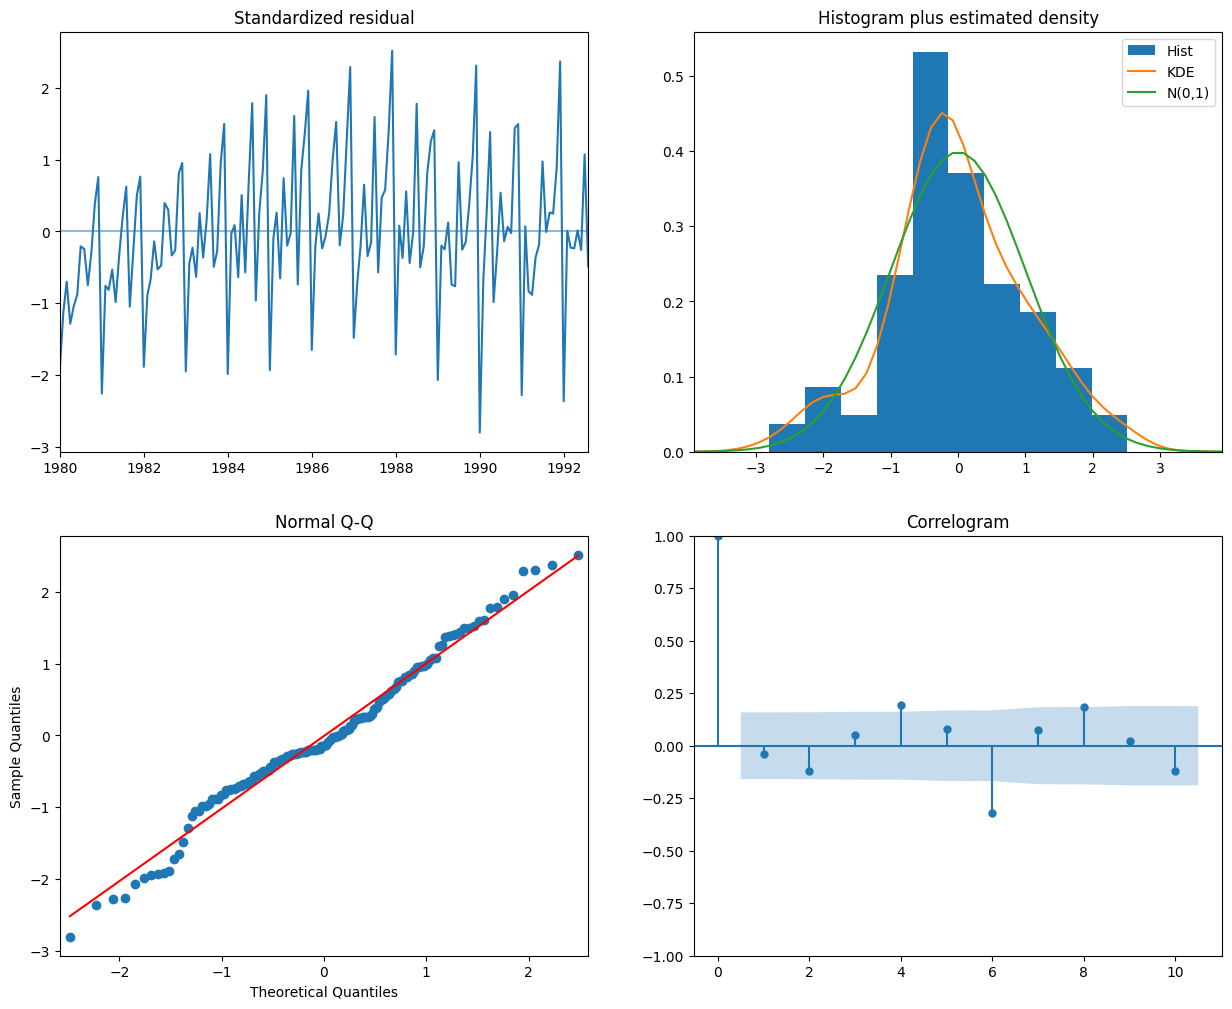

In [21]:
plot=MA.plot_diagnostics(figsize=(15, 12))

<Axes: title={'center': 'Forecasting with AR'}>

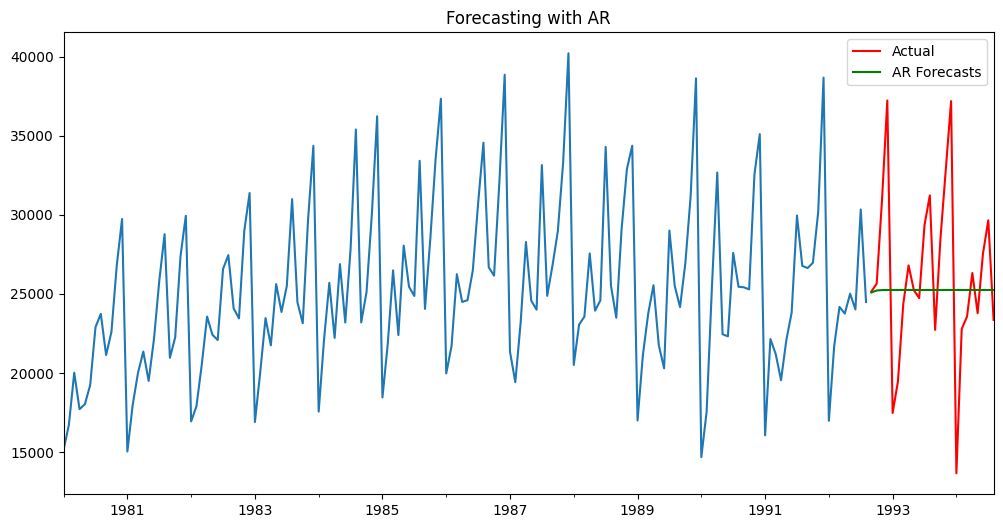

In [22]:
forecasts = AR.predict(24)
forecasts = pd.Series(forecasts, index=test.index).rename('AR Forecasts')
ax = train.plot()
ax = test.plot(legend=True,color='red', figsize=(12,6),title='Forecasting with AR')
forecasts.plot(legend=True, color='green')

In [23]:
err = MASE(train, test, forecasts)

err

0.8461148935198826

## Exponential Smoothing

In [24]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
?ETSModel


ses_model_manual = SimpleExpSmoothing(train, initialization_method="heuristic").fit(smoothing_level=0.5, optimized=False)

ses_model_auto = SimpleExpSmoothing(train, initialization_method="estimated").fit()

/Users/vcerq/miniconda/envs/NDS_TimeSeries/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/vcerq/miniconda/envs/NDS_TimeSeries/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/vcerq/miniconda/envs/NDS_TimeSeries/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Init signature:
ETSModel(
    endog,
    error='add',
    trend=None,
    damped_trend=False,
    seasonal=None,
    seasonal_periods=None,
    initialization_method='estimated',
    initial_level=None,
    initial_trend=None,
    initial_seasonal=None,
    bounds=None,
    dates=None,
    freq=None,
    missing='none',
)
Docstring:     
ETS models.

Parameters
----------
endog : array_like
    The observed time-series process :math:`y`
error : str, optional
    The error model. "add" (default) or "mul".
trend : str or None, optional
    The trend component model. "add", "mul", or None (default).
damped_trend : bool, optional
    Whether or not an included trend component is damped. Default is
    False.
seasonal : str, optional
    The seasonality model. "add", "mul", or None (default).
seasonal_periods : int, optional
    The number of periods in a complete seasonal cycle for seasonal
    (Holt-Winters) models. For example, 4 for quarterly data with an
    annual cycle or 7 for daily

In [25]:
ses_model_manual.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       SimpleExpSmoothing Model Results                       
==============================================================================
Dep. Variable:                   None   No. Observations:                  152
Model:             SimpleExpSmoothing   SSE                     5042940676.246
Optimized:                      False   AIC                           2636.241
Trend:                           None   BIC                           2642.289
Seasonal:                        None   AICC                          2636.513
Seasonal Periods:                None   Date:                 Mon, 08 Jul 2024
Box-Cox:                        False   Time:                         22:18:13
Box-Cox Coeff.:                  None                                         
==============================================================================
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.5000000                alpha                False
initial_level              15277.067                  l.0                False
------------------------------------------------------------------------------
"""

In [26]:
ses_model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       SimpleExpSmoothing Model Results                       
==============================================================================
Dep. Variable:                   None   No. Observations:                  152
Model:             SimpleExpSmoothing   SSE                     4205674984.194
Optimized:                       True   AIC                           2608.645
Trend:                           None   BIC                           2614.692
Seasonal:                        None   AICC                          2608.917
Seasonal Periods:                None   Date:                 Mon, 08 Jul 2024
Box-Cox:                        False   Time:                         22:18:13
Box-Cox Coeff.:                  None                                         
==============================================================================
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.1086047                alpha                 True
initial_level              15277.067                  l.0                 True
------------------------------------------------------------------------------
"""

In [27]:
ses_forecasts = ses_model_auto.forecast(24)

print(MASE(train,test,ses_forecasts))

0.8460211035316227


<Axes: title={'center': 'Forecasting with SES'}>

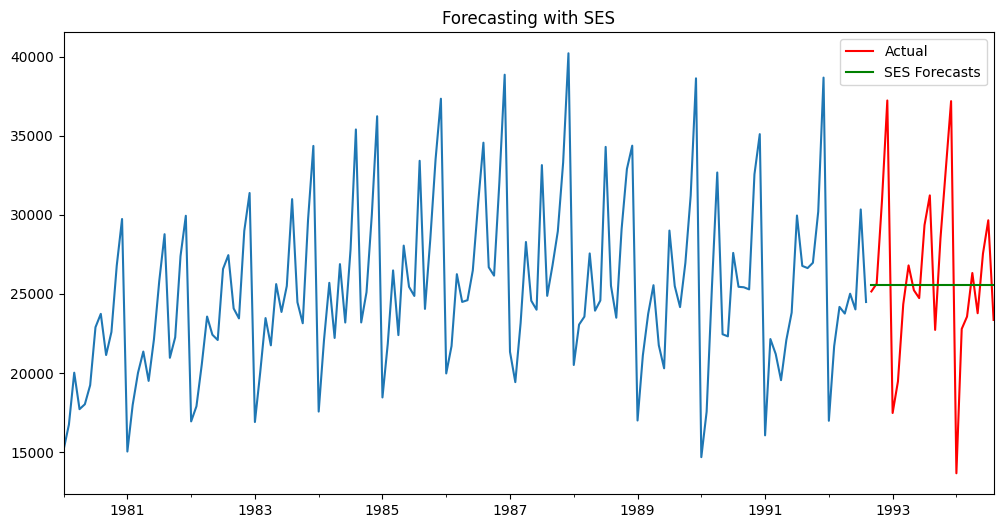

In [28]:
ses_forecasts = pd.Series(ses_forecasts, index=test.index).rename('SES Forecasts')
ax = train.plot()
ax = test.plot(legend=True,color='red', figsize=(12,6),title='Forecasting with SES')
ses_forecasts.plot(legend=True, color='green')

## Método de Holt

/Users/vcerq/miniconda/envs/NDS_TimeSeries/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/vcerq/miniconda/envs/NDS_TimeSeries/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/vcerq/miniconda/envs/NDS_TimeSeries/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/vcerq/miniconda/envs/NDS_TimeSeries/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


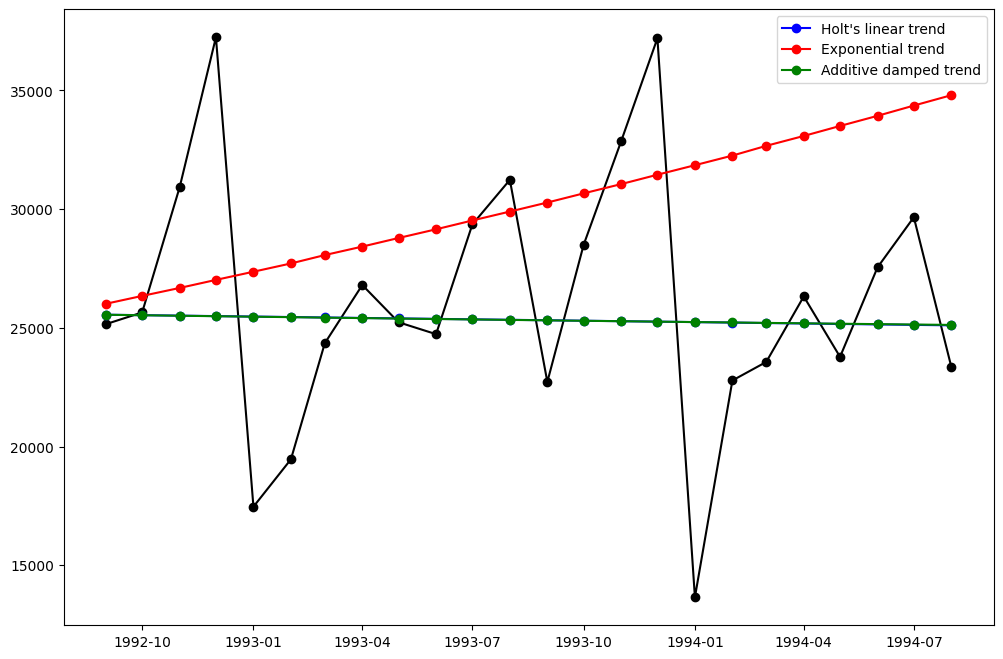

Init signature:
Holt(
    endog,
    exponential=False,
    damped_trend=False,
    initialization_method=None,
    initial_level=None,
    initial_trend=None,
)
Docstring:     
Holt's Exponential Smoothing

Parameters
----------
endog : array_like
    The time series to model.
exponential : bool, optional
    Type of trend component.
damped_trend : bool, optional
    Should the trend component be damped.
initialization_method : str, optional
    Method for initialize the recursions. One of:

    * None
    * 'estimated'
    * 'heuristic'
    * 'legacy-heuristic'
    * 'known'

    None defaults to the pre-0.12 behavior where initial values
    are passed as part of ``fit``. If any of the other values are
    passed, then the initial values must also be set when constructing
    the model. If 'known' initialization is used, then `initial_level`
    must be passed, as well as `initial_trend` and `initial_seasonal` if
    applicable. Default is 'estimated'. "legacy-heuristic" uses the sa

In [29]:
?Holt

holt_model1 = Holt(train, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2, optimized=False
)
forecasts_holt_m1 = holt_model1.forecast(24).rename("Holt's linear trend")


holt_model2 = Holt(train, exponential=True, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2, optimized=False
)
forecasts_holt_m2 = holt_model2.forecast(24).rename("Exponential trend")


holt_model3 = Holt(train, damped_trend=True, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2
)
forecasts_holt_m3 = holt_model3.forecast(24).rename("Additive damped trend")


plt.figure(figsize=(12, 8))
plt.plot(test, marker="o", color="black")
(line1,) = plt.plot(forecasts_holt_m1, marker="o", color="blue")
(line2,) = plt.plot(forecasts_holt_m2, marker="o", color="red")
(line3,) = plt.plot(forecasts_holt_m3, marker="o", color="green")
plt.legend([line1, line2, line3], [forecasts_holt_m1.name, forecasts_holt_m2.name, forecasts_holt_m3.name])

In [30]:
?ExponentialSmoothing
# Holt’s Winters Seasonal Exponential Smoothing
es = ExponentialSmoothing(
    train,
    seasonal_periods=12,
    trend="add",
    seasonal="add",
    use_boxcox=False,
    initialization_method="estimated",
).fit()

forecasts_es = es.forecast(24).rename("Holt’s Winters Seasonal Exponential Smoothing")

/Users/vcerq/miniconda/envs/NDS_TimeSeries/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/vcerq/miniconda/envs/NDS_TimeSeries/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Init signature:
ExponentialSmoothing(
    endog,
    trend=None,
    damped_trend=False,
    seasonal=None,
    *,
    seasonal_periods=None,
    initialization_method='estimated',
    initial_level=None,
    initial_trend=None,
    initial_seasonal=None,
    use_boxcox=False,
    bounds=None,
    dates=None,
    freq=None,
    missing='none',
)
Docstring:     
Holt Winter's Exponential Smoothing

Parameters
----------
endog : array_like
    The time series to model.
trend : {"add", "mul", "additive", "multiplicative", None}, optional
    Type of trend component.
damped_trend : bool, optional
    Should the trend component be damped.
seasonal : {"add", "mul", "additive", "multiplicative", None}, optional
    Type of seasonal component.
seasonal_periods : int, optional
    The number of periods in a complete seasonal cycle, e.g., 4 for
    quarterly data or 7 for daily data with a weekly cycle.
initialization_method : str, optional
    Method for initialize the recursions. One of:

    

0.30275793787532257


<Axes: title={'center': 'Forecasting with ES'}>

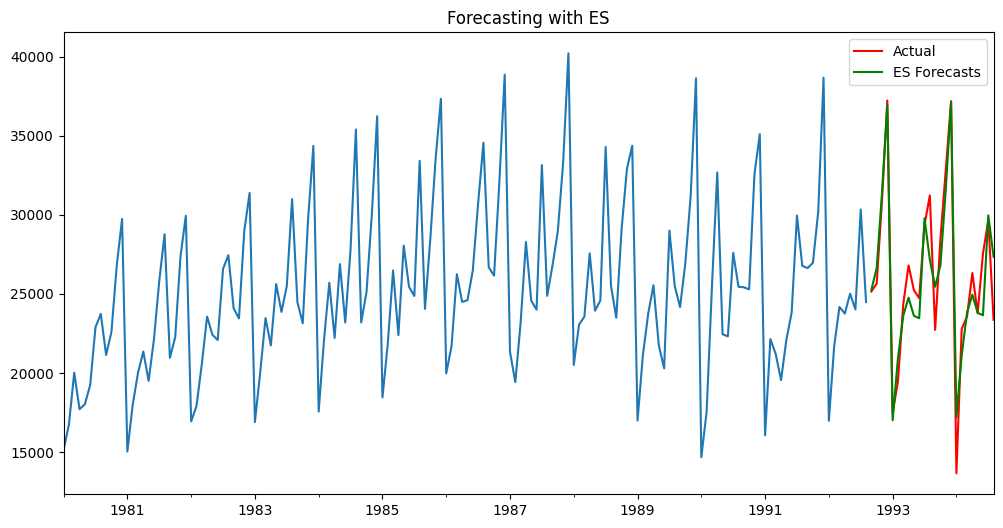

In [31]:
print(MASE(train,test,forecasts_es))

forecasts_es = forecasts_es.rename('ES Forecasts')
ax = train.plot()
ax = test.plot(legend=True,color='red', figsize=(12,6),title='Forecasting with ES')
forecasts_es.plot(legend=True, color='green')

In [32]:
ets = ETSModel(
    train,
    seasonal_periods=12,
    trend="mul",
    seasonal="mul",
    initialization_method="estimated",
).fit()

forecasts_ets = ets.forecast(24).rename("ETS")

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05866D+01    |proj g|=  9.99682D-01

At iterate    1    f=  9.87697D+00    |proj g|=  3.07430D+00

At iterate    2    f=  9.57361D+00    |proj g|=  1.00141D+00

At iterate    3    f=  9.48304D+00    |proj g|=  8.85399D-01

At iterate    4    f=  9.39951D+00    |proj g|=  3.88308D-01

At iterate    5    f=  9.32114D+00    |proj g|=  9.18178D-01

At iterate    6    f=  9.29894D+00    |proj g|=  2.11433D-01

At iterate    7    f=  9.28988D+00    |proj g|=  2.05581D-01

At iterate    8    f=  9.23982D+00    |proj g|=  1.64925D-01

At iterate    9    f=  9.21393D+00    |proj g|=  4.40864D-01

At iterate   10    f=  9.19550D+00    |proj g|=  2.71801D-01

At iterate   11    f=  9.18888D+00    |proj g|=  1.38985D+00

At iterate   12    f=  9.18213D+00    |proj g|=  4.17356D-01

At iterate   13    f=  9.1

/Users/vcerq/miniconda/envs/NDS_TimeSeries/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [33]:
ets.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ETS Results                                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  152
Model:                       ETS(AMM)   Log Likelihood               -1393.693
Date:                Mon, 08 Jul 2024   AIC                           2823.386
Time:                        22:18:28   BIC                           2877.816
Sample:                    01-01-1980   HQIC                          2845.498
                         - 08-01-1992   Scale                      5390727.479
Covariance Type:               approx                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.0206      0.046      0.448      0.654      -0.069       0.111
smoothing_trend         0.0089      0.004      2.420      0.016       0.002       0.016
smoothing_seasonal      0.4167      0.120      3.482      0.000       0.182       0.651
initial_level        2.078e+04        nan        nan        nan         nan         nan
initial_trend           1.0081      0.005    213.682      0.000       0.999       1.017
initial_seasonal.0      1.3424        nan        nan        nan         nan         nan
initial_seasonal.1      1.2066        nan        nan        nan         nan         nan
initial_seasonal.2      0.9982        nan        nan        nan         nan         nan
initial_seasonal.3      0.9589        nan        nan        nan         nan         nan
initial_seasonal.4      1.1833        nan        nan        nan         nan         nan
initial_seasonal.5      1.0905        nan        nan        nan         nan         nan
initial_seasonal.6      0.9329        nan        nan        nan         nan         nan
initial_seasonal.7      0.9095      0.033     27.966      0.000       0.846       0.973
initial_seasonal.8      0.9052      0.012     76.472      0.000       0.882       0.928
initial_seasonal.9      0.9337        nan        nan        nan         nan         nan
initial_seasonal.10     0.8055      0.038     21.045      0.000       0.730       0.880
initial_seasonal.11     1.0000        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (Q):                       29.98   Jarque-Bera (JB):                77.54
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               2.78   Skew:                            -0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

0.4271123735951805


<Axes: title={'center': 'Forecasting with ETS'}>

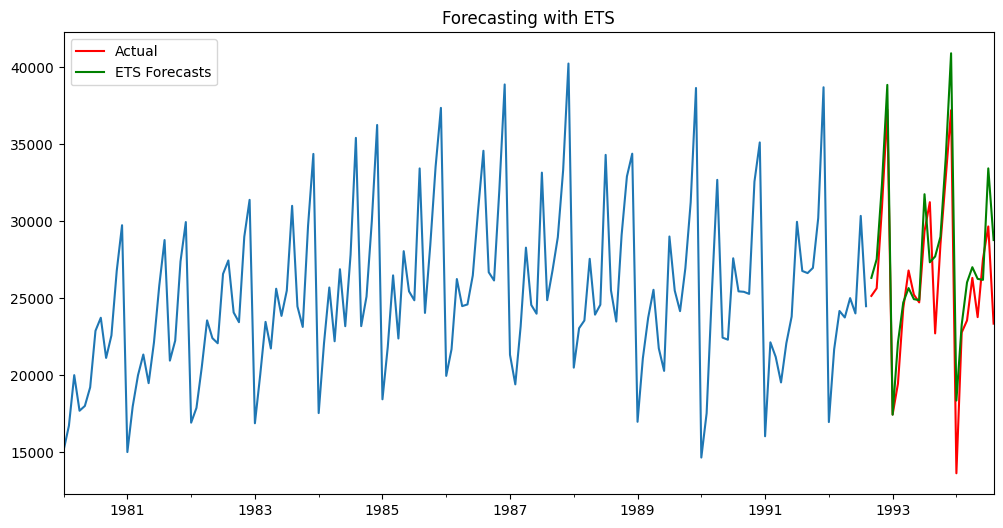

In [34]:
print(MASE(train,test,forecasts_ets))

forecasts_ets = forecasts_ets.rename('ETS Forecasts')
ax = train.plot()
ax = test.plot(legend=True,color='red', figsize=(12,6),title='Forecasting with ETS')
forecasts_ets.plot(legend=True, color='green')